# Univariate Linear Regression with Gradient Descent

In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline 

c:\users\mert_cuhadaroglu\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.datasets import load_boston
dataset = load_boston()
samples , label, feature_names = dataset.data, dataset.target, dataset.feature_names


In [3]:
bostondf = pd.DataFrame(dataset.data)
bostondf.columns = dataset.feature_names
bostondf['Target Price'] = dataset.target 
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


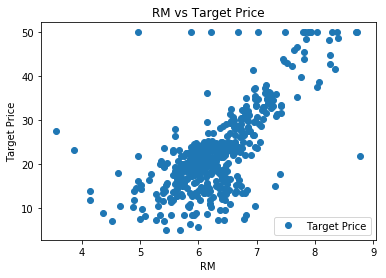

In [4]:
import matplotlib.pyplot as plt 
bostondf.plot(x='RM', y='Target Price', style= 'o')
plt.title('RM vs Target Price')
plt.ylabel('Target Price')
plt.show()

In [5]:
def prediction(X, coefficient, intercept):
    return X*coefficient + intercept

In [6]:
def cost_function(X, Y, coefficient, intercept):
    MSE = 0.0
    for i in range(len(X)):
        MSE += (Y[i] - (coefficient*X[i] + intercept))**2
    return MSE / len(X)

In [7]:
def update_weights(X, Y, coefficient, intercept, learning_rate):
    coefficient_derivative = 0
    intercept_derivative = 0

    for i in range(len(X)):
        coefficient_derivative += -2*X[i] * (Y[i] - (coefficient*X[i] + intercept))
        intercept_derivative += -2*(Y[i] - (coefficient*X[i] + intercept))
        
    coefficient -= (coefficient_derivative / len(X)) * learning_rate
    intercept -= (intercept_derivative / len(X)) * learning_rate

    return coefficient, intercept

In [8]:
def train(X, Y, coefficient, intercept, LearningRate, iteration):
    cost_hist = []
    for i in range(iteration):
        coefficient, intercept = update_weights(X, Y, coefficient, intercept, learning_rate)
        cost = cost_function(X, Y, coefficient, intercept)
        cost_hist.append(cost) 
    return coefficient, intercept, cost_hist

In [9]:
learning_rate = 0.01
iteration = 10001
coefficient = 0.3
intercept = 2
X = bostondf.iloc[:, 5:6].values  
Y = bostondf.iloc[:, 13:14].values


coefficient, intercept, cost_history = train(X, Y, coefficient, intercept, learning_rate, iteration)

In [10]:
coefficient

array([8.57526661])

In [11]:
intercept

array([-31.31931428])

In [12]:
cost_history

[array([72.59720667]),
 array([60.96727513]),
 array([60.58066489]),
 array([60.56018189]),
 array([60.55162513]),
 array([60.54346052]),
 array([60.53531248]),
 array([60.52716876]),
 array([60.51902898]),
 array([60.51089311]),
 array([60.50276115]),
 array([60.4946331]),
 array([60.48650896]),
 array([60.47838873]),
 array([60.4702724]),
 array([60.46215998]),
 array([60.45405145]),
 array([60.44594683]),
 array([60.4378461]),
 array([60.42974927]),
 array([60.42165633]),
 array([60.41356729]),
 array([60.40548213]),
 array([60.39740087]),
 array([60.38932348]),
 array([60.38124999]),
 array([60.37318037]),
 array([60.36511464]),
 array([60.35705278]),
 array([60.34899481]),
 array([60.3409407]),
 array([60.33289047]),
 array([60.32484411]),
 array([60.31680162]),
 array([60.308763]),
 array([60.30072824]),
 array([60.29269735]),
 array([60.28467032]),
 array([60.27664715]),
 array([60.26862784]),
 array([60.26061238]),
 array([60.25260078]),
 array([60.24459303]),
 array([60.236589

In [ ]:
y_hat = X*coefficient + intercept
plt.plot(X, Y, 'bo')
plt.plot(X, y_hat)
plt.show()

# Using Linear Regression to model housing prices

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [ ]:
samples , label, feature_names = dataset.data, dataset.target, dataset.feature_names

In [ ]:
samples_trim = stats.trimboth(samples, 0.1)
label_trim = stats.trimboth(label, 0.1)

In [ ]:
print(samples.shape)
print(label.shape)

In [ ]:
print(samples_trim.shape)
print(label_trim.shape)

In [ ]:
from sklearn.model_selection import train_test_split
samples_train, samples_test, label_train, label_test = train_test_split(samples_trim, label_trim, test_size= 0.2, random_state =0)

In [ ]:
print(samples_train.shape)
print(samples_test.shape)
print(label_train.shape)
print(label_test.shape)


In [ ]:
regressor = LinearRegression()
regressor.fit(samples_train, label_train)

In [ ]:
regressor.coef_

In [ ]:
regressor.intercept_

In [ ]:
label_pred = regressor.predict(samples_test)

In [ ]:
plt.scatter(label_test, label_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.axis("equal")

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(label_test, label_pred)
r2 = r2_score(label_test, label_pred)
print(mse)
print(r2)